# Effects of People's Different Attributes on Bike Trip Duration
## by _Yinghao Zhang_

## Investigation Overview

In this investigation, I wanted to look at if the bike trip duration can be predicted by different features of people. The major focus was on the birth year, user type, gender, and the time series of the start month.

## Dataset Overview

This dataset consisted of the duration and other features of the bike trip in 2017 with 517,900 observations. The features include the longitude and latitude of the start and end station, the start and end timestamp, the user's birth year and gender. Approximately 67,000 data points are removed because of missing values and outliers. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# clean the dataset
# remove the null values
df_clean = df.dropna()

# change the type of 'member_birth_year'
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

# remove the columns that are unrelated to the research question
df_clean.drop(columns=['start_station_id', 'start_station_name', 
                                 'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

# filter out the outlier of 'duration_sec'
df_clean = df_clean.query('duration_sec <= 20000')

# filter out the outlier of 'birth_year'
df_clean = df_clean.query('member_birth_year > 1937')

## Plot 1: Distribution of Duration

After the duration of bike trips is transformed by log scale, it shows a slightly right-skewed and unimodal distribution with a peek at around 500 seconds.

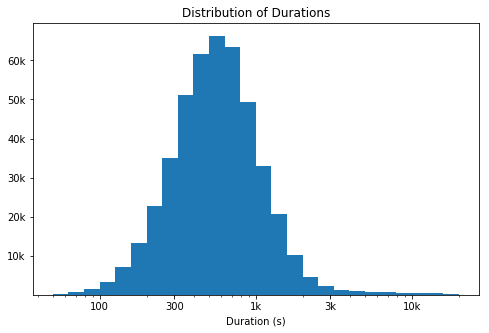

In [4]:
# set bins and ticks for the duration histogram
bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
x_ticks = [100, 300, 1000, 3000, 10000]
x_labels = [100, 300, '1k', '3k', '10k']
y_ticks = [10000, 20000, 30000, 40000, 50000, 60000]
y_labels = ['10k', '20k', '30k', '40k', '50k', '60k']

# plot the histogram
plt.figure(figsize=[8, 5])
plt.title('Distribution of Durations')
plt.hist(data=df_clean, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.xlabel('Duration (s)');

## Plot 2: Distribution of Start Time

This plot focuses on the start day and start week of day. The usage of the bike increases rapidly from June to October and slightly decreases after that. The usage from Monday to Friday is high, but Saturday and Sunday shows the steep jump in usage.

In [5]:
# extract the start and end date
from datetime import datetime

df_clean['start_date'] = df_clean.start_time.map(lambda x: x[:10])
df_clean['start_date'] = df_clean.start_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_clean['end_date'] = df_clean.end_time.map(lambda x: x[:10])
df_clean['end_date'] = df_clean.end_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# remove the unrelevant column
df_clean.drop(columns=['start_time', 'end_time'], inplace=True)

# extract the month, day, and day of week from the 'start_day'
df_clean['start_month'] = df_clean.start_date.map(lambda x: x.month)
df_clean['start_day'] = df_clean.start_date.map(lambda x: x.day)
df_clean['start_dayofweek'] = df_clean.start_date.map(lambda x: x.dayofweek)

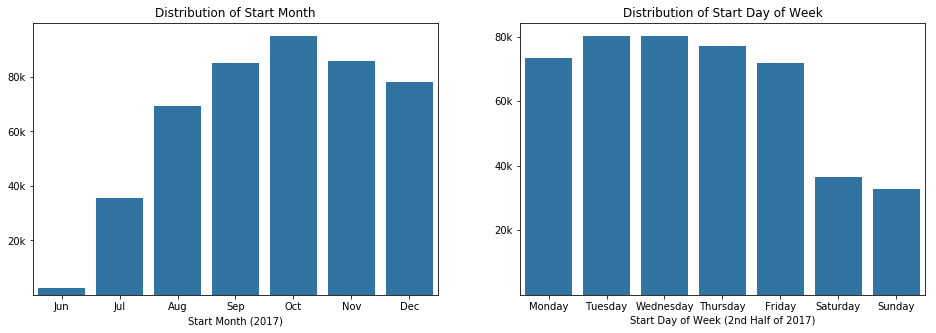

In [6]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[16, 5])

# plot the month
plt.subplot(1, 2, 1)
plt.title('Distribution of Start Month')
sns.countplot(data=df_clean, x='start_month', color=base_color)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks([20000, 40000, 60000, 80000], ['20k', '40k', '60k', '80k'])
plt.xlabel('Start Month (2017)')
plt.ylabel('')

# plot the start day of week
plt.subplot(1, 2, 2)
plt.title('Distribution of Start Day of Week')
sns.countplot(data=df_clean, x='start_dayofweek', color=base_color)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks([20000, 40000, 60000, 80000], ['20k', '40k', '60k', '80k'])
plt.xlabel('Start Day of Week (2nd Half of 2017)')
plt.ylabel('');

## Plot 3: Average Duration vs. Birth Year

People born before 1994 show a stability at 800-second average duration, except a drastic fluctuation for people born before 1954. However, people born after 1999 have an increasing average duration of bike trip.

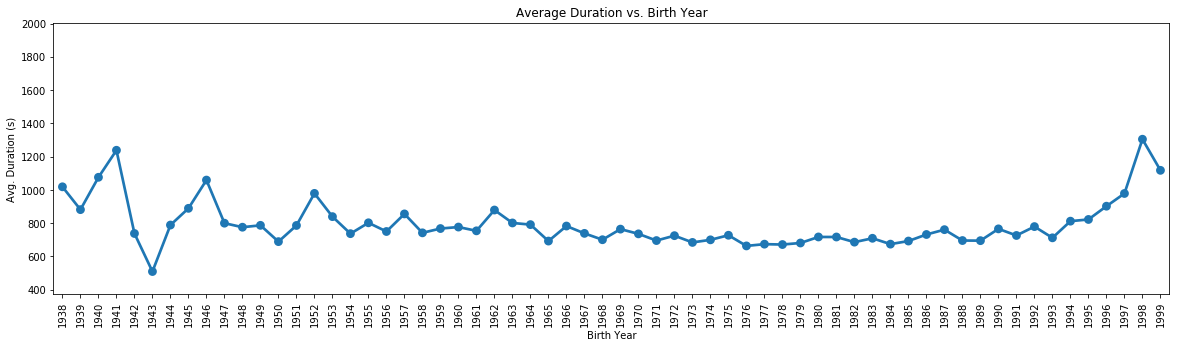

In [7]:
# plot the point plot of the birth year
plt.figure(figsize=[20, 5])

sns.pointplot(data=df_clean, x='member_birth_year', y='duration_sec', errwidth=0)
plt.title('Average Duration vs. Birth Year')
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)');

## Plot 4: Duration vs. User Type and Gender

The duration is transformed by the log scale. The subscriber has a lower mode and median of duration than the customer, while the male, female, and other have nearly the same mode and median. The subscriber and male show obvious even distribution when the duration is below 200 seconds.

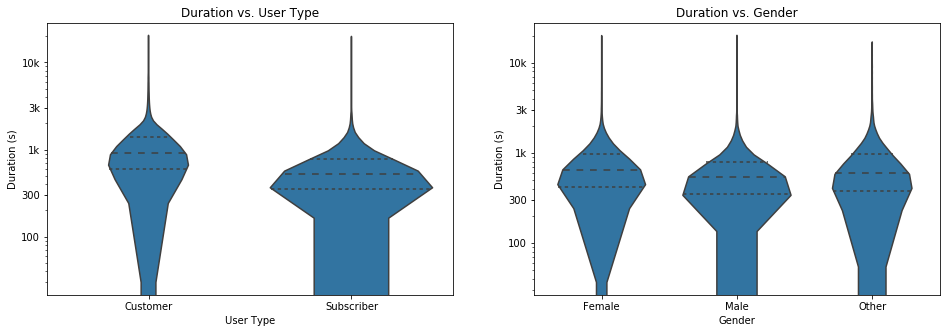

In [8]:
y_ticks = [100, 300, 1000, 3000, 10000]
y_labels = [100, 300, '1k', '3k', '10k']
base_color = sns.color_palette()[0]
plt.figure(figsize=[16, 5])

# plot the violinplot for the user type
plt.subplot(1, 2, 1)
sns.violinplot(data=df_clean, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.title('Duration vs. User Type')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('User Type')
plt.ylabel('Duration (s)')

# plot the violinplot for the gender
plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.title('Duration vs. Gender')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Gender')
plt.ylabel('Duration (s)');

## Plot 5: Average Duration vs. Start Month by User Type and Gender

For different user types, the trend of subscriber keep stable while the trend of customer decreases. This is the reason why the average duration decreases after July. For different genders, the trend is nearly the same. The interesting thing is that, despite that other gender people accounts for the least proportion, their average duration increases rapidly and keeps stable.

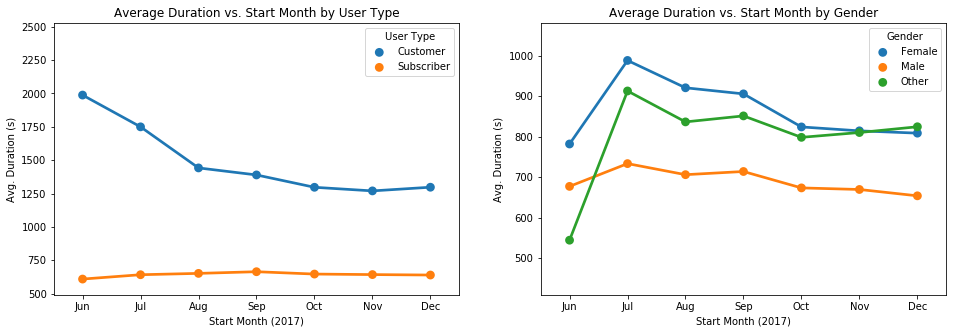

In [9]:
plt.figure(figsize=[16, 5])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sns.pointplot(data=df_clean, x='start_month', y='duration_sec', hue='user_type', errwidth=0)
plt.title('Average Duration vs. Start Month by User Type')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Start Month (2017)')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')

# plot the point plot of month vs gender
plt.subplot(1, 2, 2)
sns.pointplot(data=df_clean, x='start_month', y='duration_sec', hue='member_gender', errwidth=0)
plt.title('Average Duration vs. Start Month by Gender')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Start Month (2017)')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender');

## Key Insights

- People are likely to use bikes for short-distance travels.
- The bike usage shows an overall increase in 2017. People use bike more in weekdays than weekends.
- Young people are likely to use the bike for a relatively long duration.
- Compared to the subscriber, the customer has a higher duration but that duration decreases in 2017. 
- The other and female has a higher duration than the male.

## Recommendations
It is recommended that Ford GoBike can take marketing efforts to attract customers to become subscribers to enhance the user loyalty. The future market can target the other as a potential.